In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import os
import time
from hashlib import md5

In [ ]:
Directory = "/content"
os.chdir(Directory)
os.getcwd()
!mkdir UploadFolder
!mkdir CleanedImages

mkdir: cannot create directory ‘UploadFolder’: File exists
mkdir: cannot create directory ‘CleanedImages’: File exists


In [ ]:
image_dir = "/content/UploadFolder"
os.chdir(image_dir)
print(len(os.listdir()))

173


In [ ]:
count = 1
for ảnh in os.listdir("/content/UploadFolder"):
    if ảnh[0] != "." and ( "." in ảnh):
      img = cv2.imread("/content/UploadFolder/" + ảnh)
      if img is None:
        pass
      else:
        path = "/content/CleanedImages"
        cv2.imwrite(os.path.join(path, '{}.jpg'.format(count)), img)
        count += 1

In [ ]:
image_dir = "/content/CleanedImages"
os.chdir(image_dir)
image_files = os.listdir()
print(len(image_files))

173


In [ ]:
def filter_images(images):
    image_list = []
    for image in images:
        try:
            assert cv2.imread(image).shape[2] == 3
            image_list.append(image)
        except  AssertionError as e:
            print(e)
    return image_list

In [ ]:
#First turn the image into a gray scale image
def img_gray(image):
    image = cv2.imread(image)
    return np.average(image, weights=[0.299, 0.587, 0.114], axis=2)

In [ ]:
#resize image and flatten
def resize(image, height=30, width=30):
    row_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten()
    col_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten('F')
    return row_res, col_res

In [ ]:
import scipy.spatial
def hamming_distance(image, image2):
    score =scipy.spatial.distance.hamming(image, image2)
    return score

In [ ]:
#gradient direction based on intensity 

def intensity_diff(row_res, col_res):
    difference_row = np.diff(row_res)
    difference_col = np.diff(col_res)
    difference_row = difference_row > 0
    difference_col = difference_col > 0
    return np.vstack((difference_row, difference_col)).flatten()
    #return difference_row
    #return np.vstack((difference_row, difference_col)) #str method

In [ ]:
def difference_score(image, height = 30, width = 30):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    difference = intensity_diff(row_res, col_res)
    
    return difference

In [ ]:
def difference_score_dict(image_list):
    ds_dict = {}
    for image in image_list:
        ds = difference_score(image)
        if image not in ds_dict:
            ds_dict[image] = ds
    return  ds_dict

In [ ]:
image_files = filter_images(image_files)
ds_dict = difference_score_dict(image_files)

In [ ]:
import itertools
duplicates = []
for k1,k2 in itertools.combinations(ds_dict, 2):
    x =  hamming_distance(ds_dict[k1], ds_dict[k2])
    if hamming_distance(ds_dict[k1], ds_dict[k2]) < .10: 
        duplicates.append((k1,k2))
  


In [ ]:
type(duplicates[0])

tuple

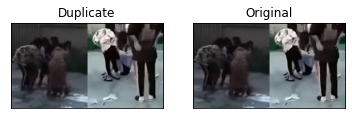

In [ ]:
for file_names in duplicates:
    try:
    
        plt.subplot(121),plt.imshow(cv2.imread(file_names[0]))
        plt.title('Duplicate'), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(cv2.imread(file_names[1]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [ ]:
Directory = "/content"
os.chdir(Directory)
!mkdir DeletedPhoto

In [ ]:
Directory = "/content/CleanedImages"
os.chdir(Directory)

In [ ]:
os.getcwd()

'/content/CleanedImages'

In [ ]:
path = "/content/CleanedImages/"
for i in duplicates:
    a = i[0]
    img = cv2.imread(path + a)
    cv2.imwrite(os.path.join( "/content/DeletedPhoto/", a), img)

In [ ]:
deletedlist = []
for index in duplicates:
    if index[0] in deletedlist:
       print(index[0])
       continue
    else:
        deletedlist.append(index[0])
        os.remove(index[0])


In [ ]:
!zip -r /content/DownloadFile.zip /content/CleanedImages
!zip -r /content/DeletedPhoto.zip /content/DeletedPhoto

  adding: content/CleanedImages/ (stored 0%)
  adding: content/CleanedImages/146.jpg (deflated 7%)
  adding: content/CleanedImages/147.jpg (deflated 9%)
  adding: content/CleanedImages/92.jpg (deflated 7%)
  adding: content/CleanedImages/56.jpg (deflated 7%)
  adding: content/CleanedImages/153.jpg (deflated 8%)
  adding: content/CleanedImages/123.jpg (deflated 4%)
  adding: content/CleanedImages/23.jpg (deflated 6%)
  adding: content/CleanedImages/64.jpg (deflated 8%)
  adding: content/CleanedImages/39.jpg (deflated 8%)
  adding: content/CleanedImages/99.jpg (deflated 4%)
  adding: content/CleanedImages/7.jpg (deflated 7%)
  adding: content/CleanedImages/98.jpg (deflated 7%)
  adding: content/CleanedImages/77.jpg (deflated 7%)
  adding: content/CleanedImages/95.jpg (deflated 8%)
  adding: content/CleanedImages/19.jpg (deflated 5%)
  adding: content/CleanedImages/30.jpg (deflated 7%)
  adding: content/CleanedImages/65.jpg (deflated 8%)
  adding: content/CleanedImages/54.jpg (deflated 8%

In [ ]:
from google.colab import files
files.download("/content/DeletedPhoto.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("/content/DownloadFile.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>